# Seras学院 データ解析 (Data Analysis)

共通モジュール `loader.py` を使用してデータを読み込みます。
自動的に型変換（Timestamp -> Datetime, Date -> Date）が行われます。

In [1]:
import polars as pl
import matplotlib.pyplot as plt
from loader import load_data

# データ読み込み
# .envの読み込みや認証は loader.py 側で行われます
df_occupancy, df_open = load_data()

print("Data loaded successfully.")

print("--- Occupancy Logs ---")
display(df_occupancy)

print("\n--- Open Logs ---")
display(df_open)

Data loaded successfully.
--- Occupancy Logs ---


Timestamp,Date,Day,Hour,Building1,Building2,Total
datetime[μs],date,str,i64,i64,i64,i64
2025-12-05 06:00:15,2025-12-05,"""Fri""",6,0,0,0
2025-12-05 06:15:15,2025-12-05,"""Fri""",6,0,0,0
2025-12-05 06:30:15,2025-12-05,"""Fri""",6,0,0,0
2025-12-05 06:45:14,2025-12-05,"""Fri""",6,0,0,0
2025-12-05 07:00:18,2025-12-05,"""Fri""",7,0,0,0
…,…,…,…,…,…,…
2025-12-10 22:15:14,2025-12-10,"""Wed""",22,0,1,1
2025-12-10 22:30:14,2025-12-10,"""Wed""",22,0,1,1
2025-12-10 22:45:20,2025-12-10,"""Wed""",22,0,1,1



--- Open Logs ---


Timestamp,Actor Name,Action,Building,UserAgent / Context
datetime[μs],str,str,str,str
2025-12-10 13:26:12,"""わたひき""","""OPEN""","""2号館""","""Web Portal"""
2025-12-10 13:26:31,"""わたひき""","""CLOSE""","""2号館""","""Web Portal"""
2025-12-10 13:43:00,"""わたひき""","""OPEN""","""2号館""","""Web Portal"""
2025-12-11 00:39:42,"""わたひき""","""CLOSE""","""2号館""","""Web Portal"""
2025-12-11 00:51:06,"""わたひき""","""OPEN""","""2号館""","""Web Portal"""
2025-12-11 00:51:13,"""わたひき""","""CLOSE""","""2号館""","""Web Portal"""


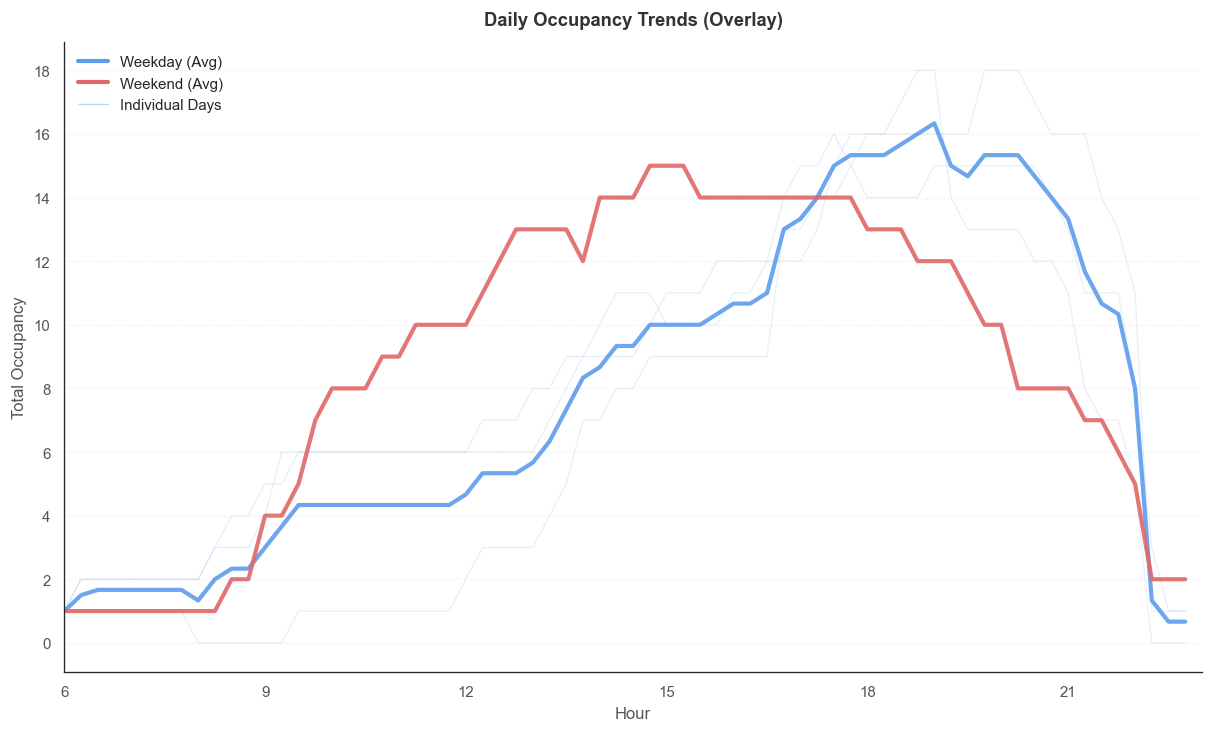

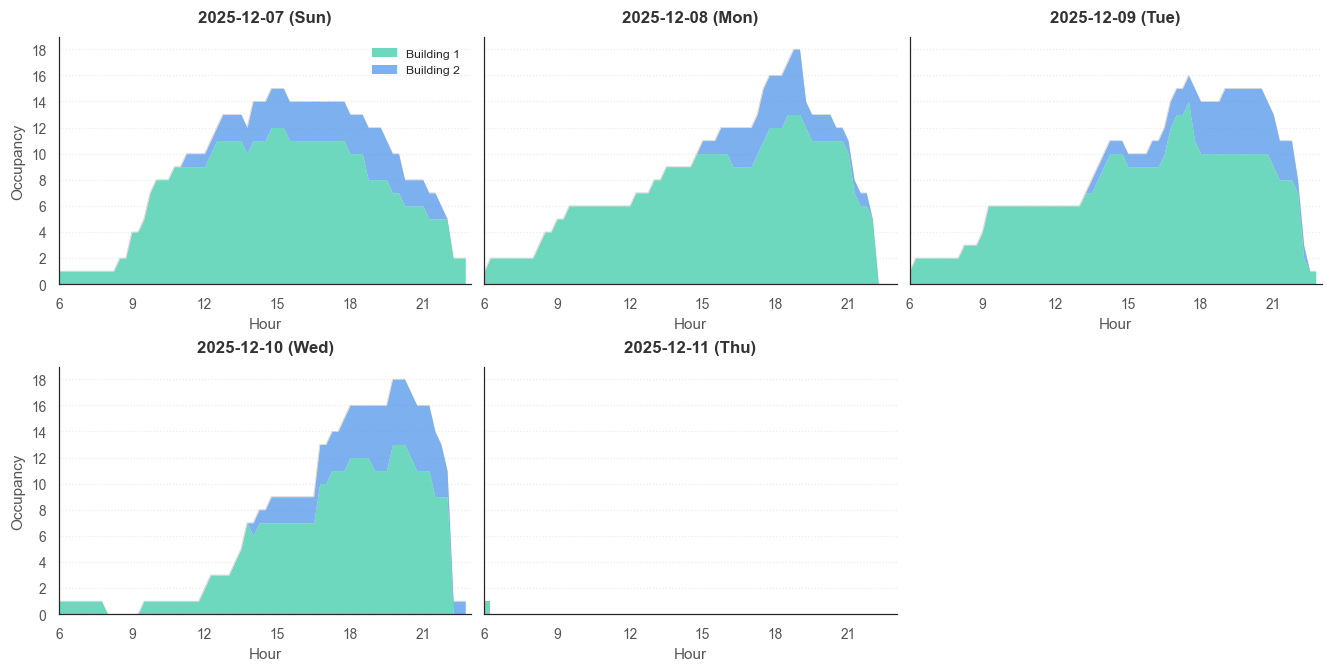

In [2]:
import importlib
import visualizer
importlib.reload(visualizer)

from visualizer import plot_daily_trends, plot_daily_breakdown

# 全体推移（オーバーレイ）
plot_daily_trends(df_occupancy, start_date="2025-12-07")

# 内訳推移（スモールマルチプル）
plot_daily_breakdown(df_occupancy, start_date="2025-12-07")